<h1> Ensemble Model</h1>
<h3> Data 602: Week 07</h3>
<h3> Submitted By: Srashti Soni (CV33938)</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df_feat = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df_feat.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_target = pd.DataFrame(iris['target'], columns=['species'])
df_target.head()

,species
0,0
1,0
2,0
3,0
4,0


In [9]:
#Splitting the data into train test
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30)

In [11]:
#After splitting, we will train the model on training data
from sklearn.ensemble import RandomForestClassifier

In [12]:
#Creating a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2000, max_depth=2)

In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=2000)

In [14]:
#predictions on the test data
y_pred=clf.predict(X_test)

In [15]:
#determining the feature importance
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.497608
petal length (cm)    0.387998
sepal length (cm)    0.096008
sepal width (cm)     0.018386
dtype: float64

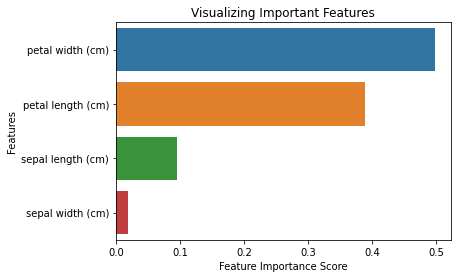

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 91.11111111111111


In [24]:
#gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=2)
model = clf.fit(X_train, y_train)
y_pred=model.predict(X_test)

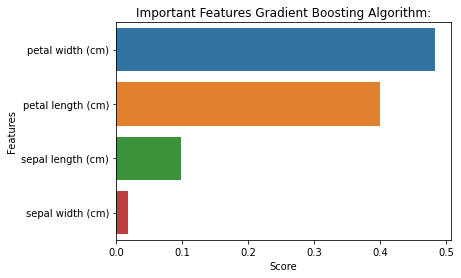

In [25]:
# feature importance through GB algorithm.
GB_feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
sns.barplot(x=GB_feature_imp, y=GB_feature_imp.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Important Features Gradient Boosting Algorithm:")

plt.show()

In [32]:
# Feature Importance for GB algorithm
print("Feature importance(%):",'\n',GB_feature_imp,)

Feature importance(%): 
 petal width (cm)     0.483214
petal length (cm)    0.400171
sepal length (cm)    0.098307
sepal width (cm)     0.018308
dtype: float64


In [28]:
# Feature importance for Gaussian Random Forest classifier
print("Feature importance(%):",'\n',feature_imp)

Feature importance(%): 
 petal width (cm)     0.496204
petal length (cm)    0.384210
sepal length (cm)    0.101361
sepal width (cm)     0.018224
dtype: float64
